In [3]:
# Matplotlib forms basis for visualization in Python
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
# We will use the Seaborn library
import seaborn as sns
sns.set()
# Graphics in SVG format are more sharp and legible
%config InlineBackend.figure_format = 'svg'

In [4]:
DATA_URL = "https://raw.githubusercontent.com/Yorko/mlcourse.ai/main/data/"
data_url = DATA_URL + "telecom_churn.csv"
df = pd.read_csv(data_url)
df.head()

State  Account length  Area code International plan Voice mail plan  \
0    KS             128        415                 No             Yes   
1    OH             107        415                 No             Yes   
2    NJ             137        415                 No              No   
3    OH              84        408                Yes              No   
4    OK              75        415                Yes              No   

   Number vmail messages  Total day minutes  Total day calls  \
0                     25              265.1              110   
1                     26              161.6              123   
2                      0              243.4              114   
3                      0              299.4               71   
4                      0              166.7              113   

   Total day charge  Total eve minutes  Total eve calls  Total eve charge  \
0             45.07              197.4               99             16.78   
1             27.47              195.5              103             16.62   
2             41.38              121.2              110             10.30   
3             50.90               61.9               88              5.26   
4             28.34              148.3              122             12.61   

   Total night minutes  Total night calls  Total night charge  \
0                244.7                 91               11.01   
1                254.4                103               11.45   
2                162.6                104                7.32   
3                196.9                 89                8.86   
4                186.9                121                8.41   

   Total intl minutes  Total intl calls  Total intl charge  \
0                10.0                 3               2.70   
1                13.7                 3               3.70   
2                12.2                 5               3.29   
3                 6.6                 7               1.78   
4                10.1                 3               2.73   

   Customer service calls  Churn  
0                       1  False  
1                       1  False  
2                       0  False  
3                       2  False  
4                       3  False

array([[<Axes: title={'center': 'Total day minutes'}>,
        <Axes: title={'center': 'Total intl calls'}>]], dtype=object)

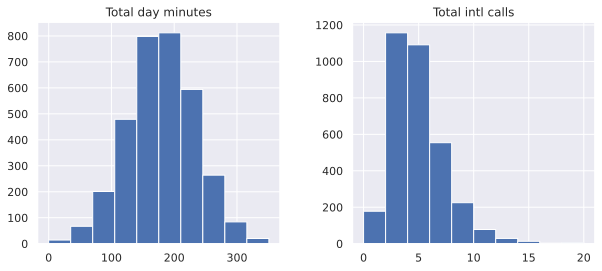

In [5]:
# Specify the features to be visualized
selected_features = ["Total day minutes", "Total intl calls"]
# Plot histograms for the selected features with specified figure size
df[selected_features].hist(figsize=(10, 4))

array([[<Axes: ylabel='Density'>, <Axes: ylabel='Density'>]], dtype=object)

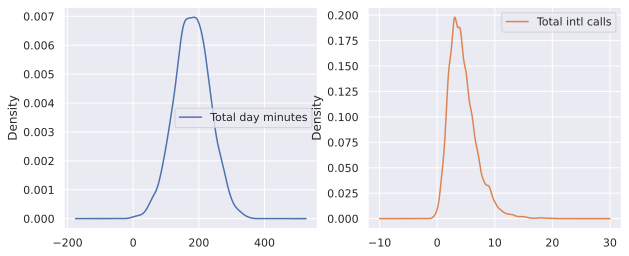

In [6]:
# Create density plots for the specified features with separate subplots

df[selected_features].plot(kind='density', subplots=True, layout=(1,2), sharex=False, figsize=(10,4)
)


<Axes: xlabel='Total intl calls', ylabel='Density'>

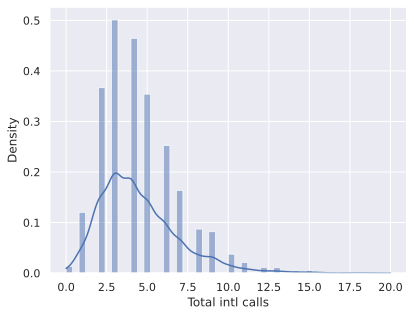

In [8]:
sns.histplot(df["Total intl calls"], kde=True, stat="density")

<Axes: xlabel='Total intl calls'>

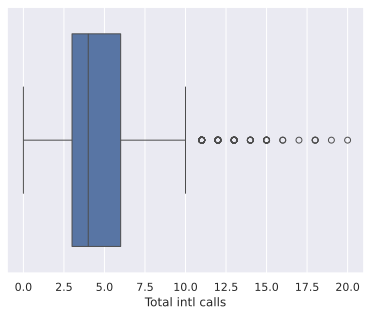

In [9]:
sns.boxplot(x=df["Total intl calls"], data=df)

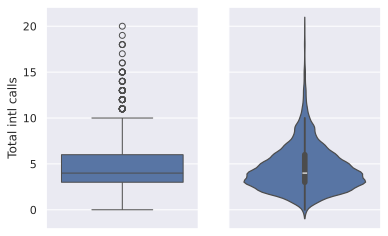

In [10]:
_, axes = plt.subplots(1, 2, sharey=True, figsize=(6, 4))
sns.boxplot(data=df["Total intl calls"], ax=axes[0])
sns.violinplot(data=df["Total intl calls"], ax=axes[1]);

In [11]:
df[selected_features].describe()

Total day minutes  Total intl calls
count        3333.000000       3333.000000
mean          179.775098          4.479448
std            54.467389          2.461214
min             0.000000          0.000000
25%           143.700000          3.000000
50%           179.400000          4.000000
75%           216.400000          6.000000
max           350.800000         20.000000

In [12]:
df["Churn"].value_counts()

Churn
False    2850
True      483
Name: count, dtype: int64

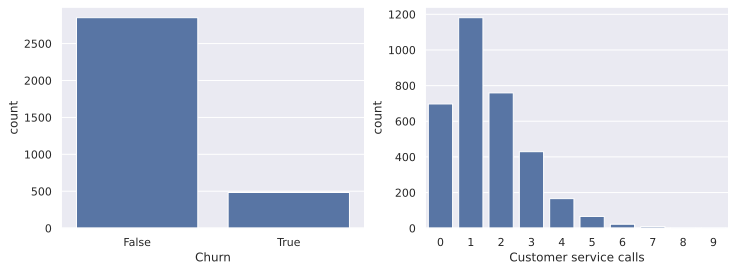

In [13]:
_, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))
sns.countplot(x="Churn", data=df, ax=axes[0])
sns.countplot(x="Customer service calls", data=df, ax=axes[1]);

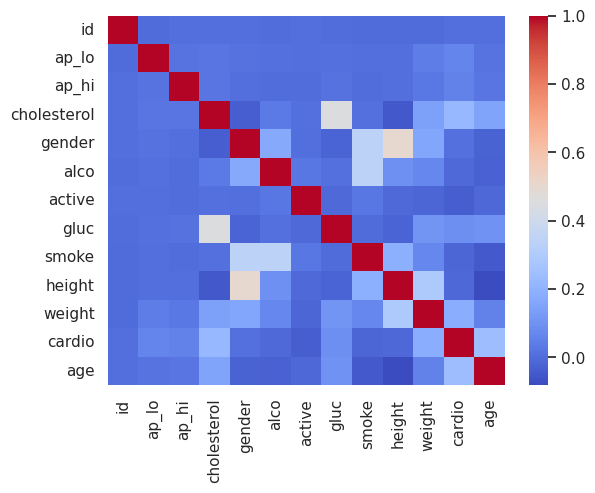

In [63]:
# Drop non-numerical variables
numerical = list(
set(df.columns)
- set(
[
"State",
"International plan",
"Voice mail plan",
"Area code",
"Churn",
"Customer service calls",
]
)
)
# Calculate and plot
corr_matrix = df[numerical].corr()
sns.heatmap(corr_matrix,cmap="coolwarm");

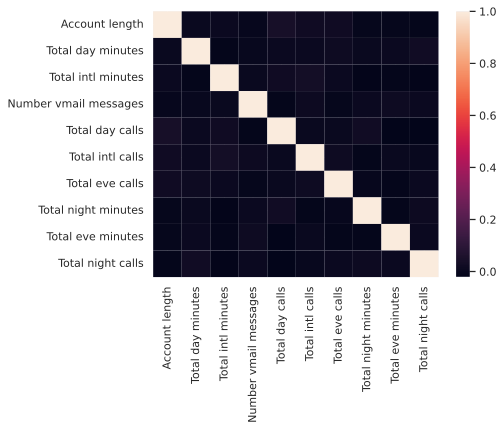

In [15]:
numerical = list(
set(numerical)
- set(
[
"Total day charge",
"Total eve charge",
"Total night charge",
"Total intl charge",
]
)
)
corr_matrix = df[numerical].corr()
sns.heatmap(corr_matrix);

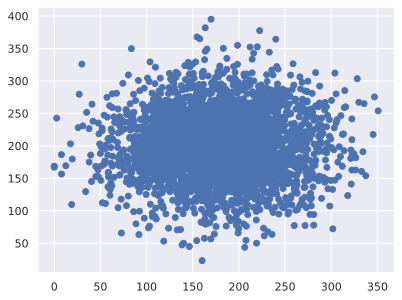

In [16]:
plt.scatter(df["Total day minutes"], df["Total night minutes"]);


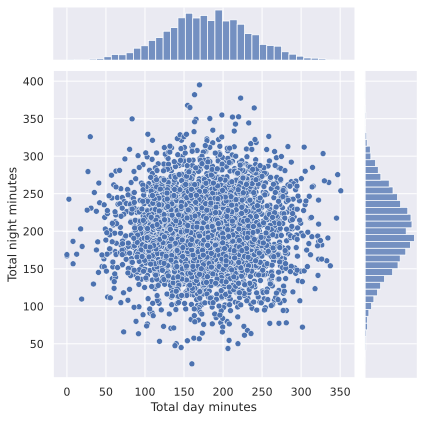

In [17]:
sns.jointplot(x="Total day minutes", y="Total night minutes", data=df, kind="scatter");

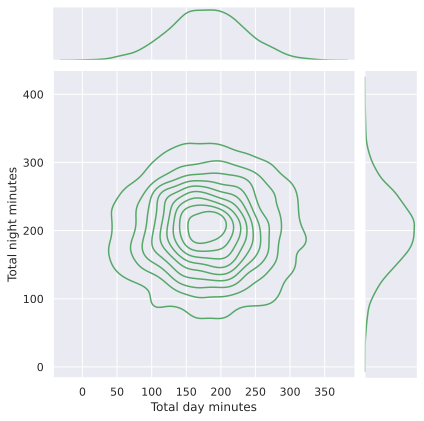

In [18]:
sns.jointplot(
x="Total day minutes", y="Total night minutes", data=df, kind="kde", color="g"
);

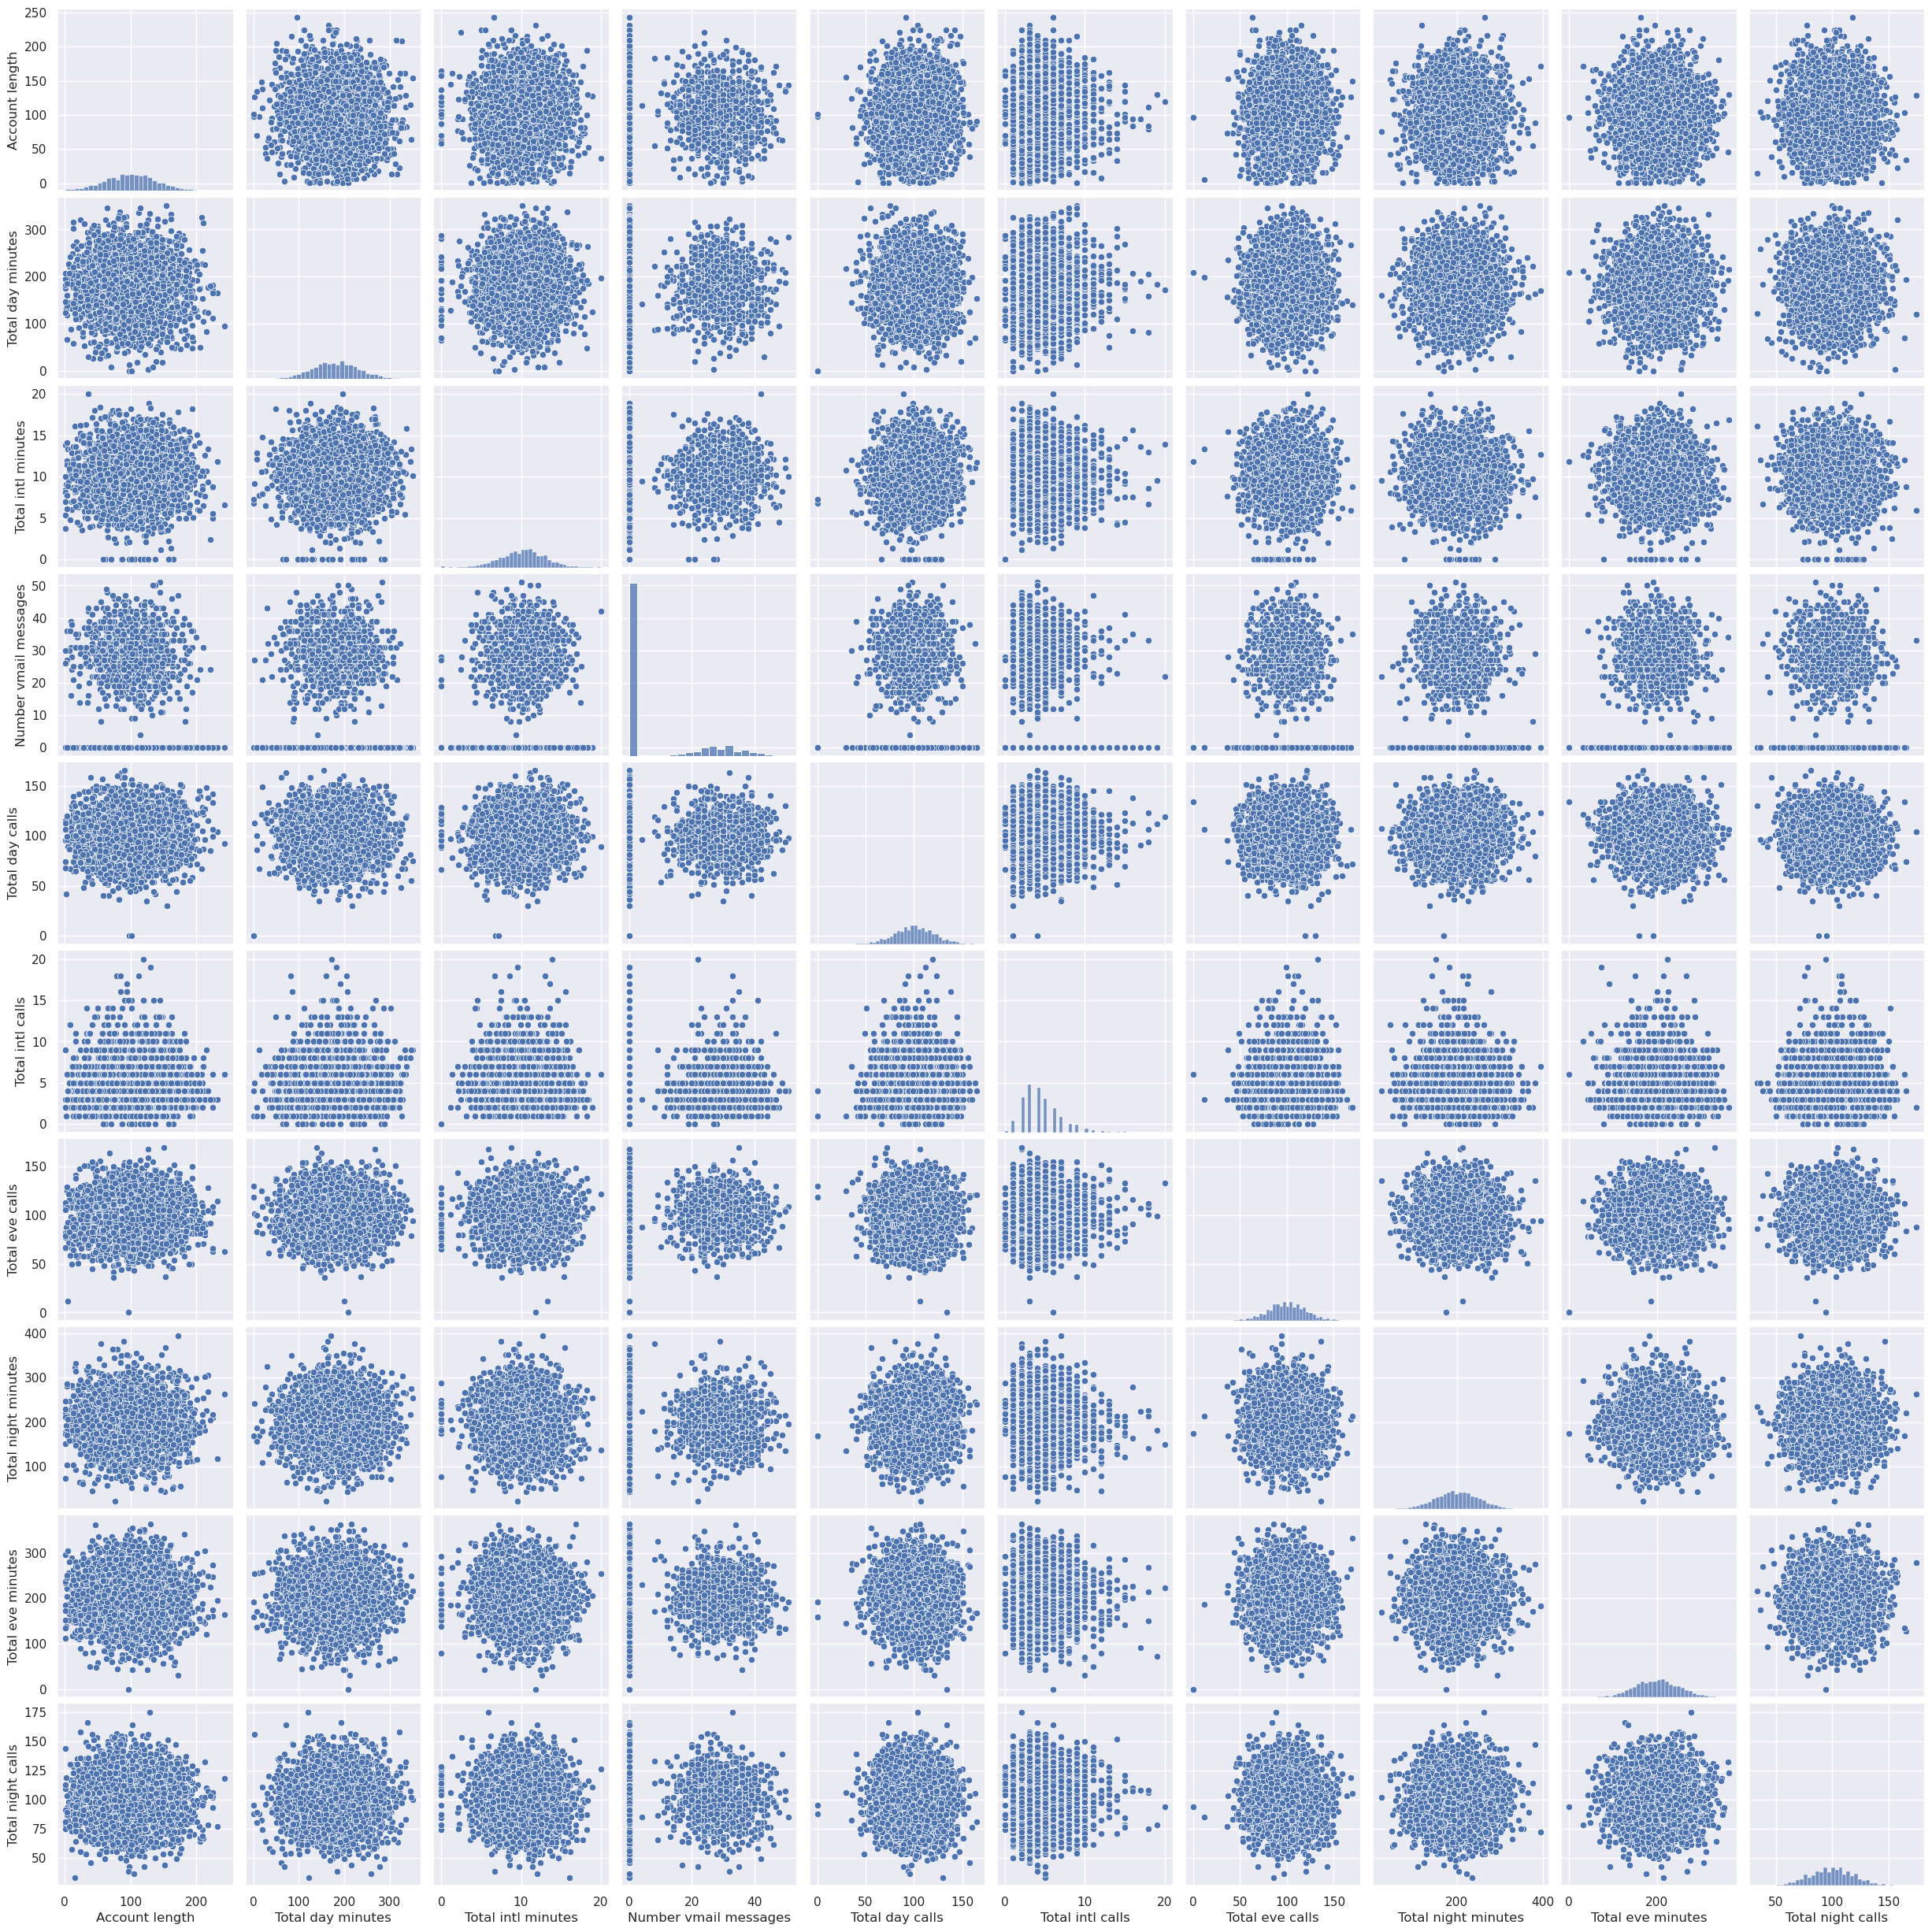

In [19]:
# `pairplot()` may become very slow with the SVG format
%config InlineBackend.figure_format = 'png'
sns.pairplot(df[numerical])

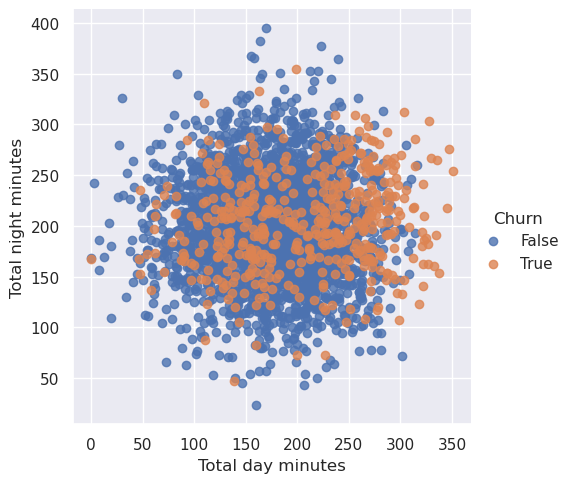

In [20]:
sns.lmplot(x="Total day minutes", y="Total night minutes", data=df, hue="Churn", fit_reg=False);

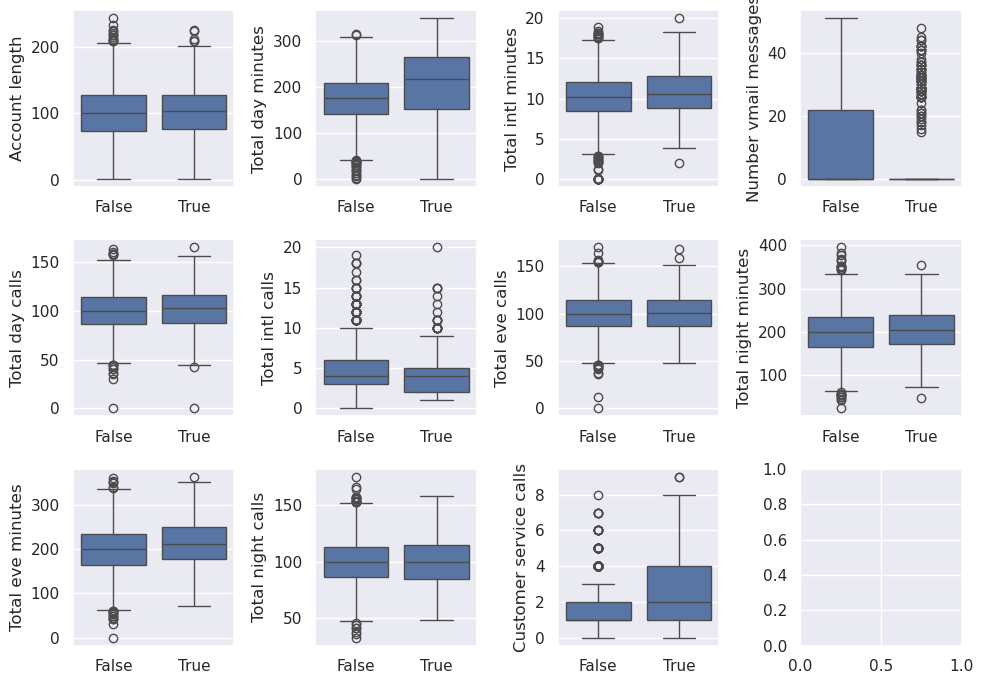

In [21]:
# Sometimes you can analyze an ordinal variable just as numerical one

numerical.append("Customer service calls")

fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(10, 7))
for idx, feat in enumerate(numerical):
    ax = axes[int(idx / 4), idx % 4]
    sns.boxplot(x="Churn", y=feat, data=df, ax=ax)
    ax.set_xlabel("")
    ax.set_ylabel(feat)
fig.tight_layout();

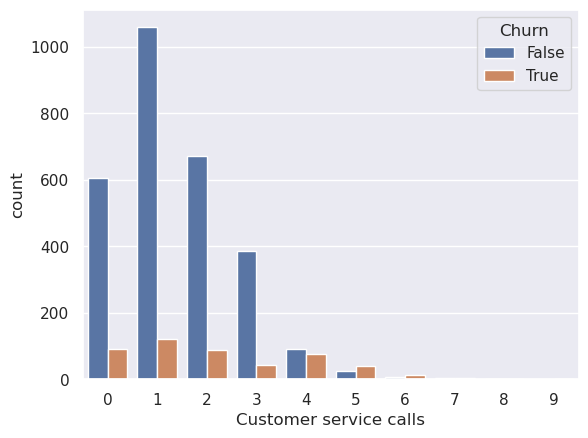

In [23]:
sns.countplot(x="Customer service calls", hue="Churn", data=df);

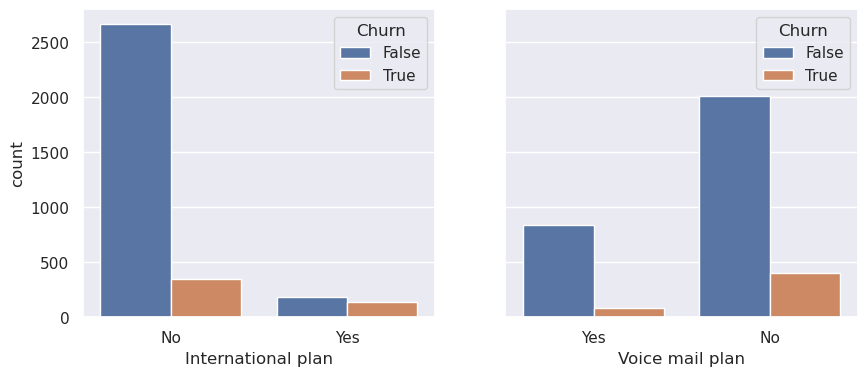

In [27]:
_,axes =plt.subplots(1,2,figsize=(10,4),sharey=True)
sns.countplot(x="International plan", hue="Churn", data=df, ax=axes[0])
sns.countplot(x="Voice mail plan", hue="Churn", data=df, ax=axes[1]);

In [29]:
pd.crosstab(df["State"], df["Churn"]).T

State  AK  AL  AR  AZ  CA  CO  CT  DC  DE  FL  ...  SD  TN  TX  UT  VA  VT  \
Churn                                          ...                           
False  49  72  44  60  25  57  62  49  52  55  ...  52  48  54  62  72  65   
True    3   8  11   4   9   9  12   5   9   8  ...   8   5  18  10   5   8   

State  WA  WI  WV  WY  
Churn                  
False  52  71  96  68  
True   14   7  10   9  

[2 rows x 51 columns]

In [31]:
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

In [32]:
X = df.drop(["Churn", "State"], axis=1)
X["International plan"] = X["International plan"].map({"Yes": 1, "No": 0})
X["Voice mail plan"] = X["Voice mail plan"].map({"Yes": 1, "No": 0})

In [33]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [34]:
%%time
tsne = TSNE(random_state=17)
X_tsne = tsne.fit_transform(X_scaled)

CPU times: user 51.1 s, sys: 50.1 ms, total: 51.1 s
Wall time: 13 s


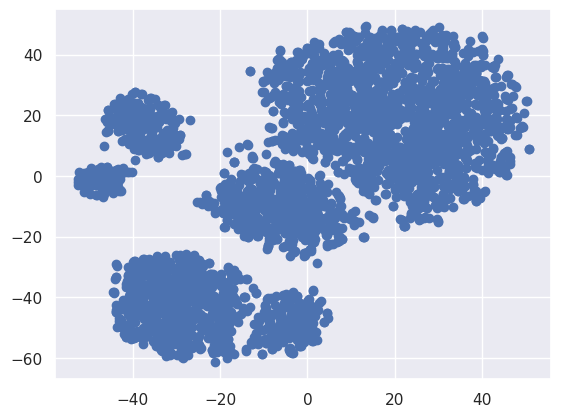

In [35]:
plt.scatter(X_tsne[:, 0], X_tsne[:, 1] )

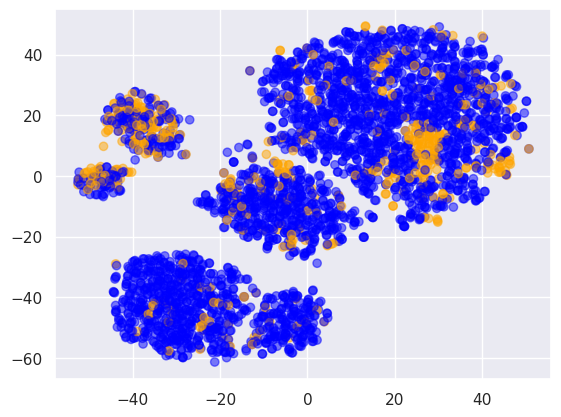

In [38]:
plt.scatter(
    X_tsne[:, 0],
    X_tsne[:, 1],
    c=df["Churn"].map({False: "blue", True: "orange"}),
    alpha=0.5,
);


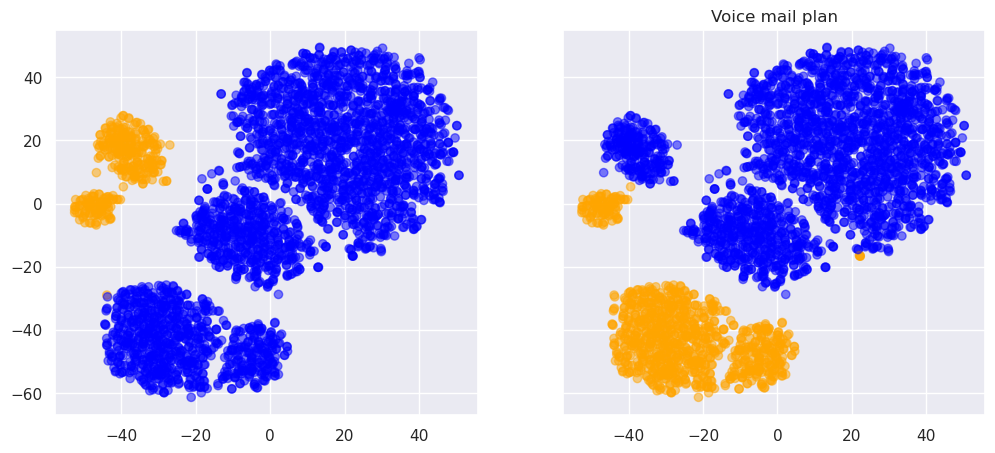

In [40]:
_, axes = plt.subplots(1, 2, sharey=True, figsize=(12, 5))
for i, name in enumerate(["International plan", "Voice mail plan"]):
    axes[i].scatter(
        X_tsne[:, 0],
        X_tsne[:, 1],
        c=df[name].map({"Yes": "orange", "No": "blue"}),
        alpha=0.5,
)
axes[i].set_title(name);

In [41]:
## Assignment 1:
DATA_PATH = "https://raw.githubusercontent.com/Yorko/mlcourse.ai/main/data/"
df = pd.read_csv(DATA_PATH + "mlbootcamp5_train.csv", sep=";")
print("Dataset size: ", df.shape)
df.head()

Dataset size:  (70000, 13)


id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
0   0  18393       2     168    62.0    110     80            1     1      0   
1   1  20228       1     156    85.0    140     90            3     1      0   
2   2  18857       1     165    64.0    130     70            3     1      0   
3   3  17623       2     169    82.0    150    100            1     1      0   
4   4  17474       1     156    56.0    100     60            1     1      0   

   alco  active  cardio  
0     0       1       0  
1     0       1       1  
2     0       0       1  
3     0       1       1  
4     0       0       0

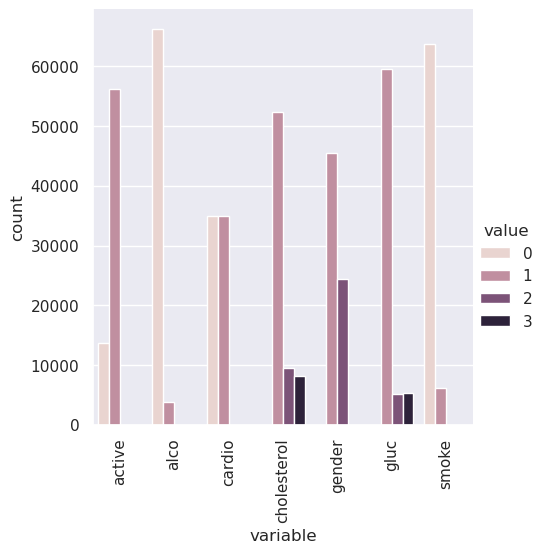

In [42]:
df_uniques = pd.melt(
frame=df,
value_vars=["gender", "cholesterol", "gluc", "smoke", "alco", "active", "cardio"],
)
df_uniques = (
pd.DataFrame(df_uniques.groupby(["variable", "value"])["value"].count())
.sort_index(level=[0, 1])
.rename(columns={"value": "count"})
.reset_index()
)
sns.catplot(
x="variable", y="count", hue="value", data=df_uniques, kind="bar"
)
plt.xticks(rotation='vertical');

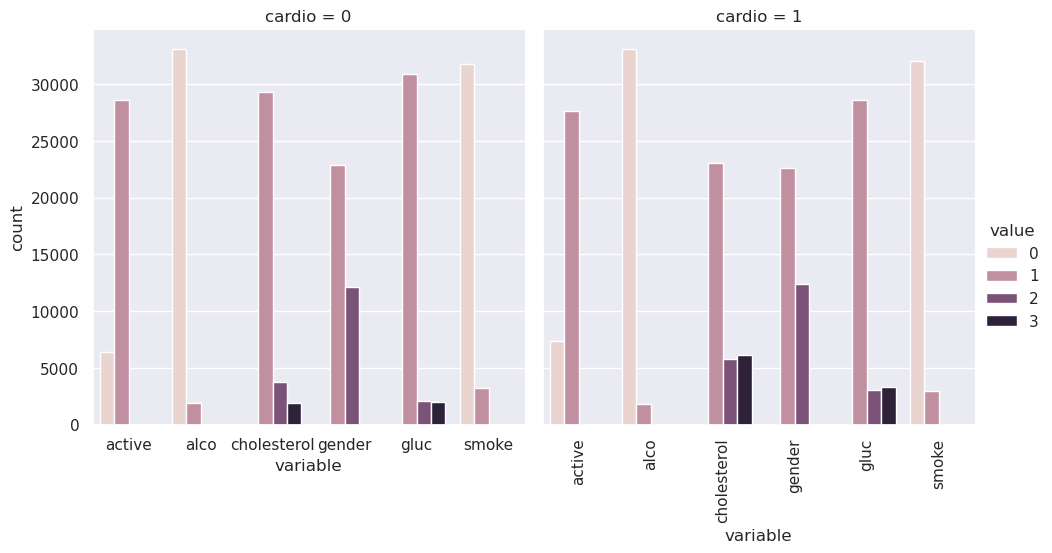

In [43]:
df_uniques = pd.melt(
frame=df,
value_vars=["gender", "cholesterol", "gluc", "smoke", "alco", "active"],
id_vars=["cardio"],
)
df_uniques = (
pd.DataFrame(df_uniques.groupby(["variable", "value", "cardio"])["value"].count())
.sort_index(level=[0, 1])
.rename(columns={"value": "count"})
.reset_index()
)
sns.catplot(
x="variable",
y="count",
hue="value",
col="cardio",
data=df_uniques,
kind="bar"
)
plt.xticks(rotation='vertical');

In [44]:
for c in df.columns:
    n = df[c].nunique()
    print(c)
    if n <= 3:
      print(n, sorted(df[c].value_counts().to_dict().items()))
    else:
     print(n)
    print(10 * "-")

id
70000
----------
age
8076
----------
gender
2 [(1, 45530), (2, 24470)]
----------
height
109
----------
weight
287
----------
ap_hi
153
----------
ap_lo
157
----------
cholesterol
3 [(1, 52385), (2, 9549), (3, 8066)]
----------
gluc
3 [(1, 59479), (2, 5190), (3, 5331)]
----------
smoke
2 [(0, 63831), (1, 6169)]
----------
alco
2 [(0, 66236), (1, 3764)]
----------
active
2 [(0, 13739), (1, 56261)]
----------
cardio
2 [(0, 35021), (1, 34979)]
----------
